Засоби підготовки та аналізу даних

Лабораторна робота №4 

Завдання другого рівня

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [115]:
column_names = [f'A{i}' for i in range(1, 16)] + ['Class']
data = pd.read_csv("crx.data", names=column_names, na_values='?')

print("Перші 5 рядків зчитаного датасету:")
print(data.head())

Перші 5 рядків зчитаного датасету:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 Class
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0     +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560     +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824     +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3     +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0     +


In [116]:
missing_summary = data.isnull().sum()
print("Пропущені значення до обробки:\n", missing_summary)

Пропущені значення до обробки:
 A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64


In [117]:
for col in data.columns:
    before = data[col].isnull().sum()
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())
    after = data[col].isnull().sum()
    if before > 0:
        print(f"{col}: заповнено {before - after} значень")

print("\nПропущені значення після обробки:\n", data.isnull().sum())

A1: заповнено 12 значень
A2: заповнено 12 значень
A4: заповнено 6 значень
A5: заповнено 6 значень
A6: заповнено 9 значень
A7: заповнено 9 значень
A14: заповнено 13 значень

Пропущені значення після обробки:
 A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
Class    0
dtype: int64


In [118]:
print(data.isnull().sum())

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
Class    0
dtype: int64


In [119]:
def standardize(df, columns):
    result = df.copy()
    for col in columns:
        mean = result[col].mean()
        std = result[col].std()
        result[col] = (result[col] - mean) / std
    return result

data_std = standardize(data, data.select_dtypes(include=['float64', 'int64']).columns.tolist())
print(data_std.describe())

                 A2            A3            A8           A11           A14  \
count  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02   
mean  -5.663746e-17  1.029772e-17  1.029772e-16  1.029772e-17  4.633974e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.503228e+00 -9.559198e-01 -6.643947e-01 -4.935286e-01 -1.068864e+00   
25%   -7.506932e-01 -7.550425e-01 -6.150897e-01 -4.935286e-01 -6.041776e-01   
50%   -2.483003e-01 -4.035072e-01 -3.655762e-01 -4.935286e-01 -1.394916e-01   
75%    5.179438e-01  4.919034e-01  1.200038e-01  1.233822e-01  5.110688e-01   
max    4.107037e+00  4.668645e+00  7.851932e+00  1.328414e+01  1.054829e+01   

                A15  
count  6.900000e+02  
mean   1.029772e-17  
std    1.000000e+00  
min   -1.952717e-01  
25%   -1.952717e-01  
50%   -1.943120e-01  
75%   -1.193615e-01  
max    1.899821e+01  


In [120]:
def normalize(df, columns):
    result = df.copy()
    for col in columns:
        min_val = result[col].min()
        max_val = result[col].max()
        result[col] = (result[col] - min_val) / (max_val - min_val)
    return result

data_norm = normalize(data, data.select_dtypes(include=['float64', 'int64']).columns.tolist())
print(data_norm.describe())


               A2          A3          A8         A11         A14         A15
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000
mean     0.267942    0.169954    0.078014    0.035821    0.092007    0.010174
std      0.178245    0.177792    0.117422    0.072581    0.086080    0.052101
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.134135    0.035714    0.005789    0.000000    0.040000    0.000000
50%      0.223684    0.098214    0.035088    0.000000    0.080000    0.000050
75%      0.360263    0.257411    0.092105    0.044776    0.136000    0.003955
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000


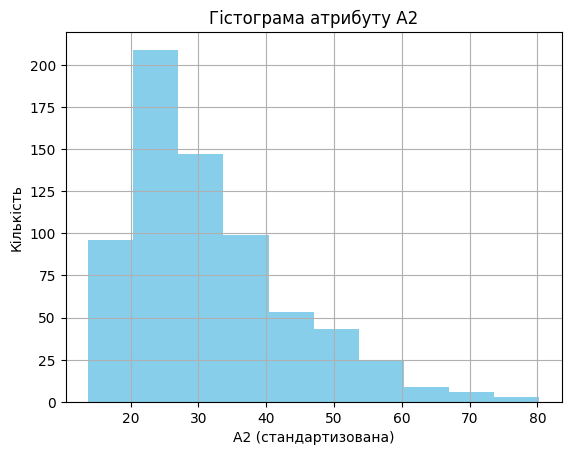

In [121]:
plt.figure()
plt.hist(data['A2'], bins=10, color='skyblue')
plt.title("Гістограма атрибуту A2")
plt.xlabel("A2 (стандартизована)")
plt.ylabel("Кількість")
plt.grid(True)
plt.show()


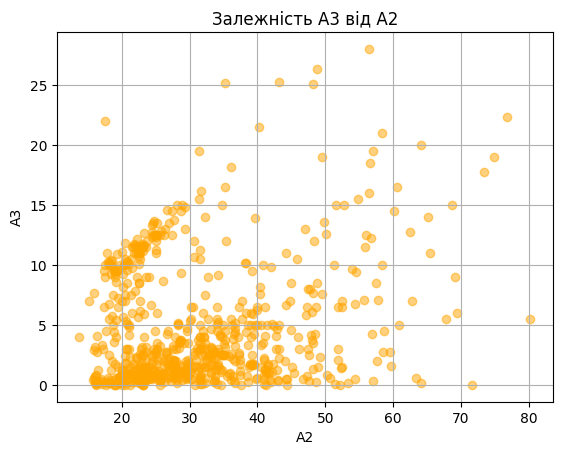

In [122]:
plt.figure()
plt.scatter(data['A2'], data['A3'], alpha=0.5, color='orange')
plt.title("Залежність A3 від A2")
plt.xlabel("A2")
plt.ylabel("A3")
plt.grid(True)
plt.show()


In [123]:
data_encoded = pd.get_dummies(data, columns=['A1'], drop_first=True)
data_encoded.head()


,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class,A1_b
0,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,True
1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,False
2,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,False
3,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,True
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,True


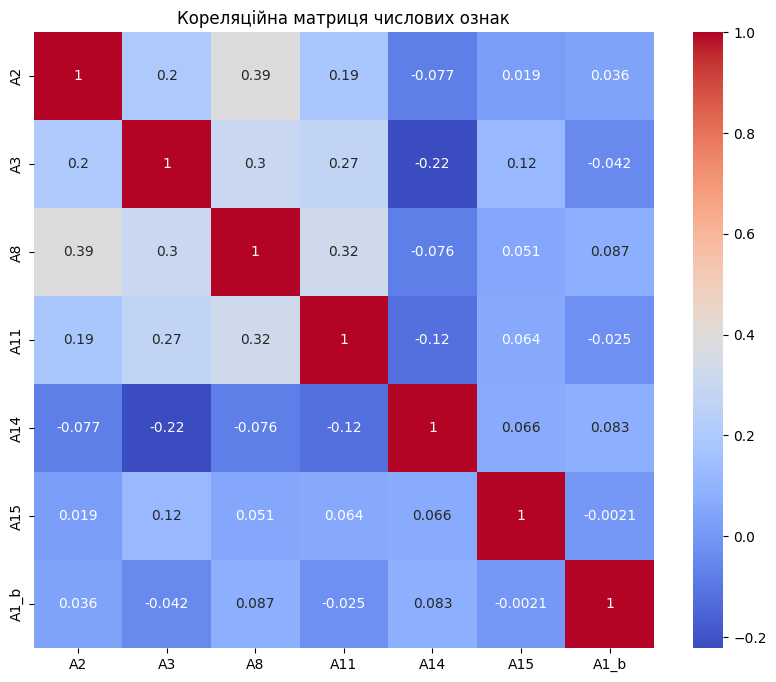

In [124]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця числових ознак')
plt.show()


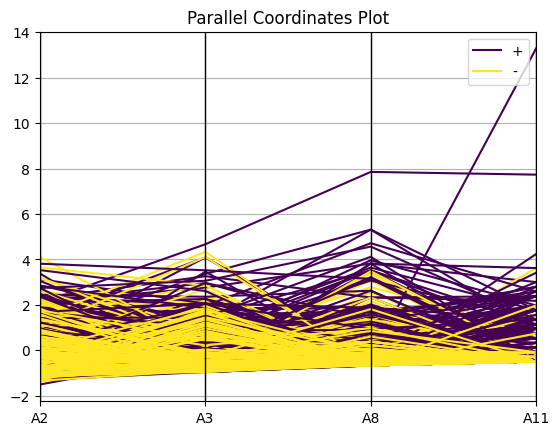

In [125]:
subset = data_std[['A2', 'A3', 'A8', 'A11']].copy()
subset['Class'] = data['Class']
parallel_coordinates(subset, 'Class', colormap='viridis')
plt.title("Parallel Coordinates Plot")
plt.show()
